# Data Description 
1-id: unique identifier

2-gender: "Male", "Female" or "Other"

3-age: age of the patient

4-hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5-heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6-ever_married: "No" or "Yes"

7-work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8-Residence_type: "Rural" or "Urban"

9-avg_glucose_level: average glucose level in blood

10-bmi: body mass index

11-smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12-stroke: 1 if the patient had a stroke or 0 if not

#  import libraries

In [68]:
import pandas as pd  #We use the panda to treat the big datasets 
import numpy as np  # we use it to make it easier to work with arrays
import matplotlib.pyplot as plt # we use it to data visualization and graphical ploting
import missingno as msno # we use it to visualize the missing values
import seaborn as sns
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Let’s now to import the csv file 

In [2]:
hds = pd.read_csv('healthcare-dataset-stroke-data.csv') #this method used for importing "csv file"
hds.head(30)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
hds.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
hds.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


------------------------------------------------------------------------------------
# Data Cleansing 
## 1- Handling the missing values:
### Visualize the missing data with  "missingno lib"

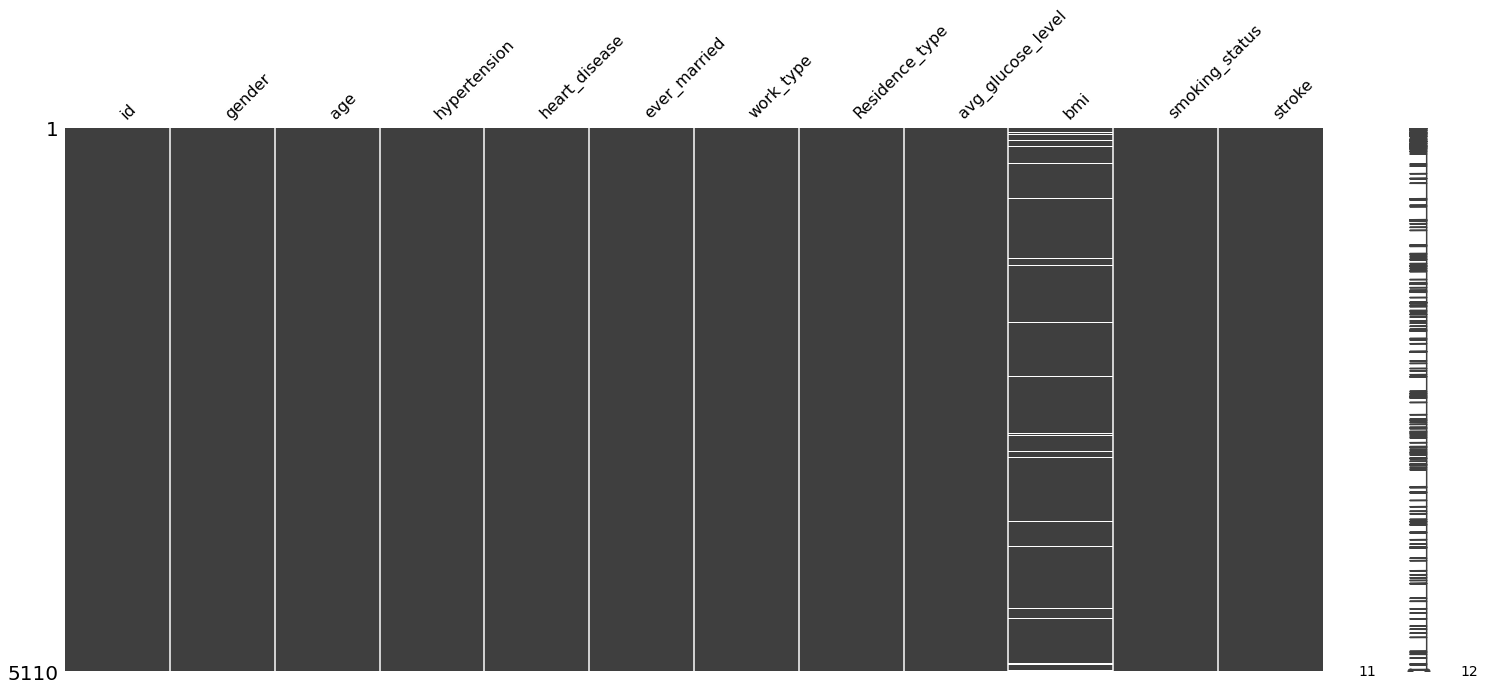

In [5]:
msno.matrix(hds); #this method used for to know how we hae missing values 

#### from the graph we identify the missing values in column "bmi" 
##### let's now  calculate how many we have missing values

In [6]:
hds.isnull().sum().sort_values(ascending = False) # take the count of missing values

bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

In [7]:
(((hds.isnull().sum()/hds.isnull().count()))).sort_values(ascending = False)

bmi                  0.039335
id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
smoking_status       0.000000
stroke               0.000000
dtype: float64

### let's now to handling  the missing values in "bmi" attribute 

In [8]:
hds['bmi'] = hds['bmi'].fillna(round(hds['bmi'].mean(),2))
hds.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:>

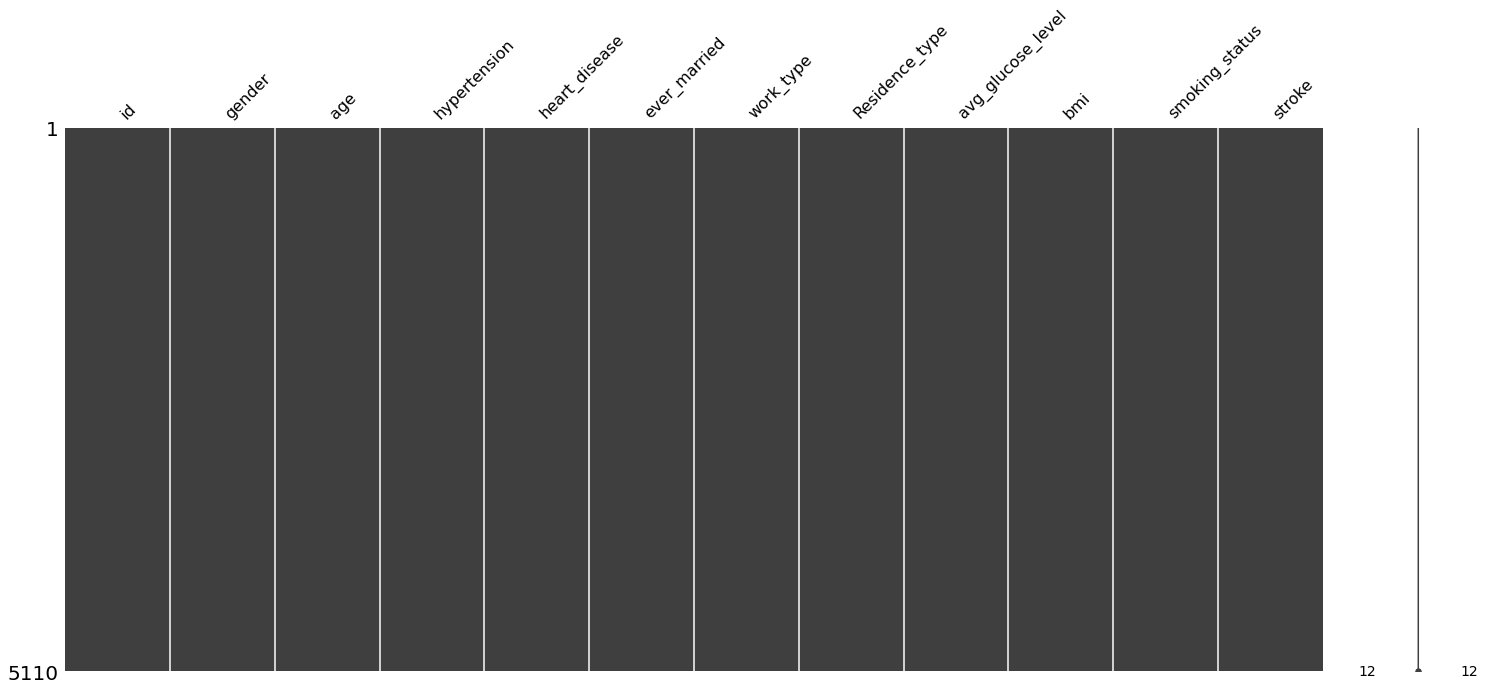

In [9]:
msno.matrix(hds)

# Let’s now plot the Boxplot for each attribute

<AxesSubplot:>

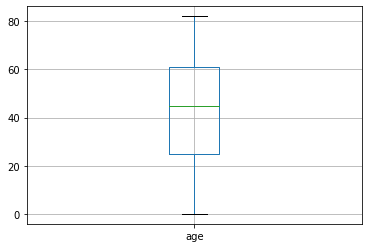

In [10]:
plt.figure()
hds.boxplot(['age'])

<AxesSubplot:>

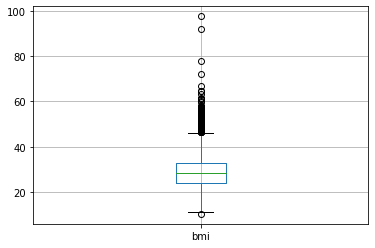

In [11]:
plt.figure()
hds.boxplot(['bmi'])

<AxesSubplot:>

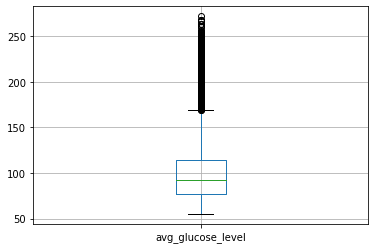

In [12]:
plt.figure()
hds.boxplot(['avg_glucose_level'])

In [13]:
list_of_maxes = {"age":hds['age'].max(),"avg_glucose_level":hds['avg_glucose_level'].max(),"bmi":hds['bmi'].max()}
print(list_of_maxes)
print('------------------------------------------------')
#the outliers in attributs:
Q1 = hds.quantile(0.25)
Q3 = hds.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

{'age': 82.0, 'avg_glucose_level': 271.74, 'bmi': 97.6}
------------------------------------------------
id                   36940.750
age                     36.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       36.845
bmi                      9.000
stroke                   0.000
dtype: float64


In [14]:
outlier = IQR * 1.5
print(outlier)

id                   55411.1250
age                     54.0000
hypertension             0.0000
heart_disease            0.0000
avg_glucose_level       55.2675
bmi                     13.5000
stroke                   0.0000
dtype: float64


In [15]:
outlier1 = Q1-outlier
outlier2 = Q3+outlier
print(outlier1)
print('----------------------------------')
print(outlier2)

id                  -37669.8750
age                    -29.0000
hypertension             0.0000
heart_disease            0.0000
avg_glucose_level       21.9775
bmi                     10.3000
stroke                   0.0000
dtype: float64
----------------------------------
id                   110093.1250
age                     115.0000
hypertension              0.0000
heart_disease             0.0000
avg_glucose_level       169.3575
bmi                      46.3000
stroke                    0.0000
dtype: float64


In [16]:
hds_new = hds[((hds['bmi'] <= 46) & (hds['bmi']>=10)) &((hds['avg_glucose_level']>=21) & (hds['avg_glucose_level']<=160))]
hds_new.head(30)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.40,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.80,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.89,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.20,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.70,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.80,smokes,1
12,12175,Female,54.0,0,0,Yes,Private,Urban,104.51,27.30,smokes,1
18,27458,Female,60.0,0,0,No,Private,Urban,89.22,37.80,never smoked,1
24,4219,Male,71.0,0,0,Yes,Private,Urban,102.87,27.20,formerly smoked,1


<AxesSubplot:>

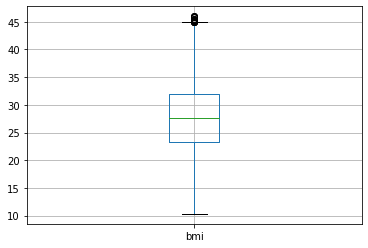

In [17]:
plt.figure()
hds_new.boxplot(['bmi'])

In [18]:
hds_new.count()

id                   4348
gender               4348
age                  4348
hypertension         4348
heart_disease        4348
ever_married         4348
work_type            4348
Residence_type       4348
avg_glucose_level    4348
bmi                  4348
smoking_status       4348
stroke               4348
dtype: int64

<AxesSubplot:>

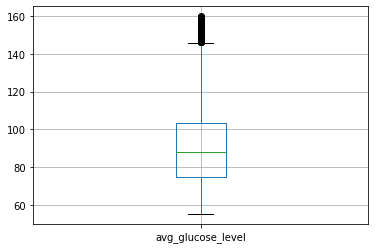

In [19]:
plt.figure()
hds_new.boxplot(['avg_glucose_level'])

In [20]:
round(hds_new.describe(),0)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4348.0,4348.0,4348.0,4348.0,4348.0,4348.0,4348.0
mean,36507.0,41.0,0.0,0.0,91.0,28.0,0.0
std,21190.0,23.0,0.0,0.0,22.0,7.0,0.0
min,67.0,0.0,0.0,0.0,55.0,10.0,0.0
25%,17740.0,23.0,0.0,0.0,75.0,23.0,0.0
50%,36839.0,42.0,0.0,0.0,88.0,28.0,0.0
75%,54808.0,58.0,0.0,0.0,103.0,32.0,0.0
max,72940.0,82.0,1.0,1.0,160.0,46.0,1.0


<AxesSubplot:xlabel='bmi', ylabel='age'>

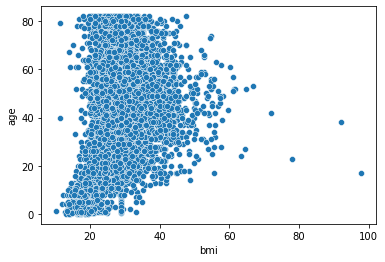

In [21]:
sns.scatterplot(x = hds['bmi'], y = hds['age'])

<AxesSubplot:xlabel='bmi', ylabel='age'>

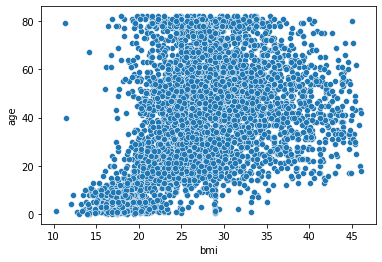

In [22]:
sns.scatterplot(x = hds_new['bmi'], y = hds_new['age'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>

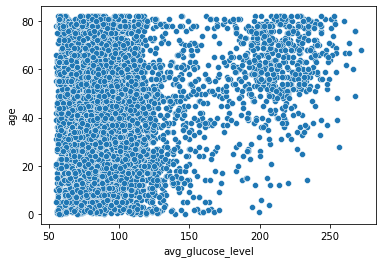

In [23]:
sns.scatterplot(x = hds['avg_glucose_level'], y = hds['age'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>

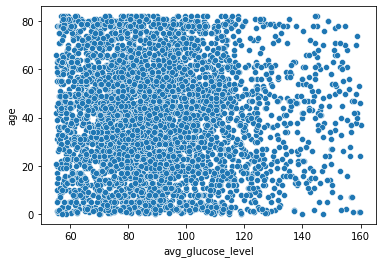

In [24]:
sns.scatterplot(x = hds_new['avg_glucose_level'], y = hds_new['age'])

<AxesSubplot:>

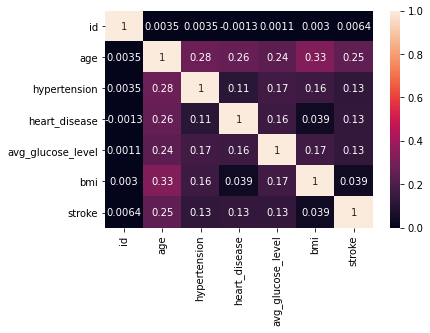

In [25]:
plt.figure()
sns.heatmap(hds.corr(),annot=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

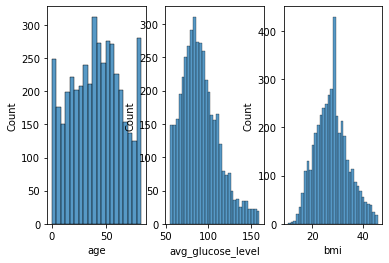

In [93]:
fig, axs = plt.subplots(ncols=3,squeeze=200);
sns.histplot(x='age', data=hds_new, ax=axs[0])
sns.histplot(x='avg_glucose_level', data=hds_new, ax=axs[1])
sns.histplot(x='bmi', data=hds_new, ax=axs[2])

In [28]:
dummy = pd.get_dummies(hds_new['gender'])

In [29]:
dummy.head()

,Female,Male,Other
2,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,1,0,0


In [30]:
hds_new_1 = pd.concat((hds_new,dummy),axis=1)

In [31]:
hds_new_1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,0,1,0
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.40,never smoked,1,0,1,0
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.80,never smoked,1,1,0,0
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.89,Unknown,1,1,0,0
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.20,Unknown,1,1,0,0


In [32]:
 hds_new_1 = hds_new_1.drop(['gender'],axis=1) 

In [33]:
hds_new_1.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,0,1,0
6,53882,74.0,1,1,Yes,Private,Rural,70.09,27.40,never smoked,1,0,1,0
7,10434,69.0,0,0,No,Private,Urban,94.39,22.80,never smoked,1,1,0,0
8,27419,59.0,0,0,Yes,Private,Rural,76.15,28.89,Unknown,1,1,0,0
9,60491,78.0,0,0,Yes,Private,Urban,58.57,24.20,Unknown,1,1,0,0


In [34]:
hds_new_1 = hds_new_1.drop(['Female'],axis=1)

In [35]:
hds_new_1.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male,Other
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,1,0
6,53882,74.0,1,1,Yes,Private,Rural,70.09,27.40,never smoked,1,1,0
7,10434,69.0,0,0,No,Private,Urban,94.39,22.80,never smoked,1,0,0
8,27419,59.0,0,0,Yes,Private,Rural,76.15,28.89,Unknown,1,0,0
9,60491,78.0,0,0,Yes,Private,Urban,58.57,24.20,Unknown,1,0,0


In [36]:
hds_new_1= hds_new_1.drop(['Other'],axis=1)

In [37]:
hds_new_1.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,1
6,53882,74.0,1,1,Yes,Private,Rural,70.09,27.40,never smoked,1,1
7,10434,69.0,0,0,No,Private,Urban,94.39,22.80,never smoked,1,0
8,27419,59.0,0,0,Yes,Private,Rural,76.15,28.89,Unknown,1,0
9,60491,78.0,0,0,Yes,Private,Urban,58.57,24.20,Unknown,1,0


In [38]:
 hds_new_1 = hds_new_1.rename(columns={'Male':'Sex'})

In [39]:
hds_new_1['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [40]:
dummy = pd.get_dummies(hds_new_1['ever_married'])

In [41]:
dummy.head()

,No,Yes
2,0,1
6,0,1
7,1,0
8,0,1
9,0,1


In [42]:
dummy = dummy.drop(['No'], axis=1)

In [43]:
dummy.head()

,Yes
2,1
6,1
7,0
8,1
9,1


In [44]:
hds_new_1 = pd.concat((hds_new_1,dummy),axis=1)

In [45]:
hds_new_1.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Sex,Yes
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,1,1
6,53882,74.0,1,1,Yes,Private,Rural,70.09,27.40,never smoked,1,1,1
7,10434,69.0,0,0,No,Private,Urban,94.39,22.80,never smoked,1,0,0
8,27419,59.0,0,0,Yes,Private,Rural,76.15,28.89,Unknown,1,0,1
9,60491,78.0,0,0,Yes,Private,Urban,58.57,24.20,Unknown,1,0,1


In [46]:
hds_new_1 = hds_new_1.drop(['ever_married'],axis=1)

In [47]:
hds_new_1.head()

,id,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Sex,Yes
2,31112,80.0,0,1,Private,Rural,105.92,32.50,never smoked,1,1,1
6,53882,74.0,1,1,Private,Rural,70.09,27.40,never smoked,1,1,1
7,10434,69.0,0,0,Private,Urban,94.39,22.80,never smoked,1,0,0
8,27419,59.0,0,0,Private,Rural,76.15,28.89,Unknown,1,0,1
9,60491,78.0,0,0,Private,Urban,58.57,24.20,Unknown,1,0,1


In [48]:
 hds_new_1 = hds_new_1.rename(columns={'Yes':'ever_married'})

In [49]:
hds_new_1.head()

,id,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Sex,ever_married
2,31112,80.0,0,1,Private,Rural,105.92,32.50,never smoked,1,1,1
6,53882,74.0,1,1,Private,Rural,70.09,27.40,never smoked,1,1,1
7,10434,69.0,0,0,Private,Urban,94.39,22.80,never smoked,1,0,0
8,27419,59.0,0,0,Private,Rural,76.15,28.89,Unknown,1,0,1
9,60491,78.0,0,0,Private,Urban,58.57,24.20,Unknown,1,0,1


In [50]:
dummy = pd.get_dummies(hds_new_1['Residence_type'])
dummy = dummy.drop(['Rural'],axis=1)
hds_new_1 = pd.concat((hds_new_1,dummy),axis=1)
hds_new_1 = hds_new_1.drop(['Residence_type'],axis=1)
hds_new_1 = hds_new_1.rename(columns={'Urban':'Residence_type'})
hds_new_1.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Sex,ever_married,Residence_type
2,31112,80.0,0,1,Private,105.92,32.50,never smoked,1,1,1,0
6,53882,74.0,1,1,Private,70.09,27.40,never smoked,1,1,1,0
7,10434,69.0,0,0,Private,94.39,22.80,never smoked,1,0,0,1
8,27419,59.0,0,0,Private,76.15,28.89,Unknown,1,0,1,0
9,60491,78.0,0,0,Private,58.57,24.20,Unknown,1,0,1,1


In [51]:
hds_sim = hds_new_1.drop(['age'],axis=1)
hds_sim.head()

,id,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Sex,ever_married,Residence_type
2,31112,0,1,Private,105.92,32.50,never smoked,1,1,1,0
6,53882,1,1,Private,70.09,27.40,never smoked,1,1,1,0
7,10434,0,0,Private,94.39,22.80,never smoked,1,0,0,1
8,27419,0,0,Private,76.15,28.89,Unknown,1,0,1,0
9,60491,0,0,Private,58.57,24.20,Unknown,1,0,1,1


In [52]:
hds_sim = hds_sim.drop(['smoking_status'],axis=1)
hds_sim.head()

,id,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,Sex,ever_married,Residence_type
2,31112,0,1,Private,105.92,32.50,1,1,1,0
6,53882,1,1,Private,70.09,27.40,1,1,1,0
7,10434,0,0,Private,94.39,22.80,1,0,0,1
8,27419,0,0,Private,76.15,28.89,1,0,1,0
9,60491,0,0,Private,58.57,24.20,1,0,1,1


In [53]:
hds_sim = hds_sim.drop(['work_type'],axis=1)

In [54]:
hds_sim = hds_sim.drop(['avg_glucose_level'],axis=1)

In [55]:
hds_sim = hds_sim.drop(['id'],axis=1)

In [56]:
hds_sim = hds_sim.drop(['bmi'],axis=1)

In [57]:
hds_sim.head()

,hypertension,heart_disease,stroke,Sex,ever_married,Residence_type
2,0,1,1,1,1,0
6,1,1,1,1,1,0
7,0,0,1,0,0,1
8,0,0,1,0,1,0
9,0,0,1,0,1,1


In [58]:
def similarity(id1,id2):
    q,r,s = 0,0,0
    for i in range(6):
        if hds_sim.iloc[id1][i] == 1 and hds_sim.iloc[id2][i] == 1:
                q +=1
        elif hds_sim.iloc[id1][i] == 1 and hds_sim.iloc[id2][i] == 0:
                r +=1
        elif hds_sim.iloc[id1][i] == 0 and hds_sim.iloc[id2][i] == 1:
                s +=1
    print("similarity= ",((q/(q+r+s))))
similarity(0,1)

similarity=  0.8


In [59]:
obj1 = 2
obj2 = 4
similarity(obj1,obj2)

similarity=  0.6666666666666666


In [66]:
hds_acc = pd.read_csv('binaryData.csv')
hds_acc

,hypertension,heart_disease,Sex,ever_married,Residence_type,bmi,avg_glucose_level,age,stroke
0,0,1,1,1,0,32.50,105.92,80.0,1
1,1,1,1,1,0,27.40,70.09,74.0,1
2,0,0,0,0,1,22.80,94.39,69.0,1
3,0,0,0,1,0,28.89,76.15,59.0,1
4,0,0,0,1,1,24.20,58.57,78.0,1
...,...,...,...,...,...,...,...,...,...
4343,0,0,0,0,0,18.60,103.08,13.0,0
4344,1,0,0,1,1,28.89,83.75,80.0,0
4345,0,0,0,1,1,40.00,125.20,81.0,0
4346,0,0,0,1,0,30.60,82.99,35.0,0


In [69]:
array = hds_acc.values
X = array[:,0:8]
Y = array[:,8]
testSize = 0.25
list  = 0.0
for n in range(100):
    seed = n
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=testSize,random_state=seed)
    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_validation)
    list  = list + accuracy_score(Y_validation, predictions)
print(round(list/100,2))

0.96
